<a href="https://colab.research.google.com/github/katerinaoleynikova/HSE_scRNA-seq/blob/main/NGS_HW4_scRNA_seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NGS / HW4 - scRNA-seq (single cell RNA sequencing)

Single-cell RNA-seq is a sequencing technique that enables to sequence data from individual cells, giving a high-resolution view of cellular distinctions and the context of their microenvironment. We can estimate the distribution of expression levels for each gene over a population of cells using scRNA-seq.

**Task 1. Methods of data processing**

During the lesson, we've analyzed the various steps of scRNA-Seq datasets processing. It is worth to note all these steps are required, firstly, in order to fight the curse of dimensionality, reduce noise in the data and get reasonable clustering eventually. Doing this task, we will have to make sure that all these steps are not meaningless and make a certain contribution to improving the biological meaning of clusters.

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# current plt is not supported by the scanpy
!python -m pip uninstall -y matplotlib
!python -m pip install scanpy matplotlib==3.1.3 # single cell analysis in python https://scanpy.readthedocs.io/en/stable/

## 1. Dataset acquisition

We should find scRNA-Seq dataset at first (related to scientific interests). 

p.s. It is important that this dataset should have a ready-made annotation. 

We also should create AnnData-object for this dataset (it is better if a dataset contains only one batch). The column 'cell type' (adata.obs['cell_type']) should have the cells annotation according to their types.

I've chosen the dataset from [10x datasets](https://www.10xgenomics.com/resources/datasets?menu%5Bproducts.name%5D=Single%20Cell%20Gene%20Expression&query=&page=1&configure%5Bfacets%5D%5B0%5D=chemistryVersionAndThroughput&configure%5Bfacets%5D%5B1%5D=pipeline.version&configure%5BhitsPerPage%5D=500&configure%5BmaxValuesPerFacet%5D=1000): 10k Human PBMCs, 3' v3.1, Chromium X (with intronic reads) (https://www.10xgenomics.com/resources/datasets/10k-human-pbmcs-3-v3-1-chromium-x-with-intronic-reads-3-1-high).

Then, I have downloaded the filtered matrix data:

In [ ]:
!wget https://cf.10xgenomics.com/samples/cell-exp/6.1.2/10k_PBMC_3p_nextgem_Chromium_X_intron/10k_PBMC_3p_nextgem_Chromium_X_intron_filtered_feature_bc_matrix.h5

After that, we can read the content of this filtered matrix and create AnnData-format object (let's call it 'adata').

In [ ]:
import scanpy as sc

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3

adata = sc.read_10x_h5('10k_PBMC_3p_nextgem_Chromium_X_intron_filtered_feature_bc_matrix.h5')
adata.var_names_make_unique()
print(adata)

reading 10k_PBMC_3p_nextgem_Chromium_X_intron_filtered_feature_bc_matrix.h5
 (0:00:04)
AnnData object with n_obs × n_vars = 11984 × 36601
    var: 'gene_ids', 'feature_types', 'genome'


The heart of the AnnData object is a matrix containing data on the number of UMI of each gene per cell. In this case, this matrix has the dimension number of cells × number of genes, that is, 11984 × 36601.

Unique molecular identifiers (UMIs) are a type of molecular barcoding that provides error correction and increased accuracy during sequencing. These molecular barcodes are short sequences used to uniquely tag each molecule in a sample library.

In [ ]:
adata.var.head() # genes annotation

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38


In [ ]:
adata.obs # cells annotation

""
AAACCCAAGGCCCAAA-1
AAACCCAAGTAATACG-1
AAACCCAAGTCACACT-1
AAACCCACAAAGCGTG-1
AAACCCACAATCGAAA-1
...
TTTGTTGGTTGGATCT-1
TTTGTTGGTTTCTTAC-1
TTTGTTGTCCATTTCA-1
TTTGTTGTCTACACAG-1


In [ ]:
# As we may see, there are no any columns like 'cell_type' for adata.obs df .. let's create it randomly (of course,
# it is awful in terms of science. But it is just for practice ^^)

In [ ]:
import numpy as np 
import pandas as pd

ct = np.random.choice(['B', 'T', 'Monocyte'], size=(adata.n_obs,))
adata.obs['cell_type'] = pd.Categorical(ct)  # categoricals are preferred for efficiency
adata.obs

,cell_type
AAACCCAAGGCCCAAA-1,T
AAACCCAAGTAATACG-1,Monocyte
AAACCCAAGTCACACT-1,B
AAACCCACAAAGCGTG-1,Monocyte
AAACCCACAATCGAAA-1,T
...,...
TTTGTTGGTTGGATCT-1,B
TTTGTTGGTTTCTTAC-1,B
TTTGTTGTCCATTTCA-1,Monocyte
TTTGTTGTCTACACAG-1,B


We've seen the original df adata.obs has no any additional info (cells annotation, i.e., indices w/ barcodes only). Let's add (according to the seminars content) the column 'tissue' - it will have 'PBMC' value.

In [ ]:
adata.obs['tissue'] = ['PBMC'] * len(adata.obs) 
# create new column that will have value = [PBMC]*N, where N = amount of this type of cells in the dataset 
adata.obs.head()

,cell_type,tissue
AAACCCAAGGCCCAAA-1,T,PBMC
AAACCCAAGTAATACG-1,Monocyte,PBMC
AAACCCAAGTCACACT-1,B,PBMC
AAACCCACAAAGCGTG-1,Monocyte,PBMC
AAACCCACAATCGAAA-1,T,PBMC


## 2. Quality Control (QC) on the cells

Perform quality control of this dataset in the ways that were discussed during the seminars. Be sure to show all the necessary diagnostic charts.

Now let's see that everything is fine with our cells. To do this, we need to calculate the following characteristics for each cell:
- How much UMI is there per cell?
- How many different genes are expressed in a cell?
- What percentage of mitochondrial expression is observed in a cell?

In the scanpy package, the entire QC process is performed by a single function.

But first we need to explicitly identify the genes that are mitochondrial ones. So, we can download a list of these genes in advance, or we can use the knowledge that in human all mitochondrial genes begin with 'MT-'.

In [ ]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
# in df containing gene annotation we will create a column that should have True, if a gene is mitochondrial
adata.var.head()

,gene_ids,feature_types,genome,mt
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,False
FAM138A,ENSG00000237613,Gene Expression,GRCh38,False
OR4F5,ENSG00000186092,Gene Expression,GRCh38,False
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,False
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,False


In [ ]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True) # evaluate QC metrics
adata.obs.head()

,cell_type,tissue,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCCAAGGCCCAAA-1,T,PBMC,4250,16164.0,785.0,4.856472
AAACCCAAGTAATACG-1,Monocyte,PBMC,3785,11838.0,495.0,4.181449
AAACCCAAGTCACACT-1,B,PBMC,4147,14493.0,843.0,5.816601
AAACCCACAAAGCGTG-1,Monocyte,PBMC,2529,7685.0,292.0,3.799609
AAACCCACAATCGAAA-1,T,PBMC,3493,11510.0,656.0,5.699392


We see that several new columns were added — we will need them after. 

Let's plot the distributions of the number of mitochondrial expression, UMI and the number of genes.

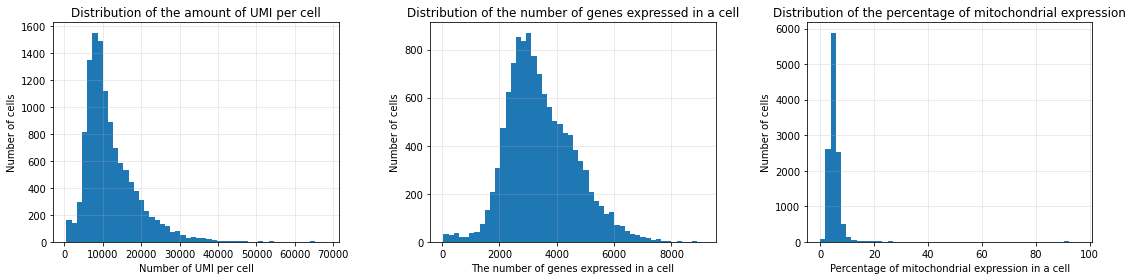

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 4)) # create grid for 3 plots

# Distribution of the total number of UMO
sns.distplot(adata.obs['total_counts'], kde=False, ax=axes[0], hist_kws={'alpha':1})
axes[0].set_xlabel('Number of UMI per cell')
axes[0].set_ylabel('Number of cells')
axes[0].set_title('Distribution of the amount of UMI per cell')
axes[0].grid(alpha=0.3)

# Distribution of the number of genes per cells
sns.distplot(adata.obs['n_genes_by_counts'], kde=False, ax=axes[1], hist_kws={'alpha':1})
axes[1].set_xlabel('The number of genes expressed in a cell')
axes[1].set_ylabel('Number of cells')
axes[1].set_title('Distribution of the number of genes expressed in a cell')
axes[1].grid(alpha=0.3)

# Distribution of mitochondrial expression
sns.distplot(adata.obs['pct_counts_mt'], kde=False, ax=axes[2], hist_kws={'alpha':1})
axes[2].set_xlabel('Percentage of mitochondrial expression in a cell')
axes[2].set_ylabel('Number of cells')
axes[2].set_title('Distribution of the percentage of mitochondrial expression')
axes[2].grid(alpha=0.3)

fig.tight_layout()

## 3. Analysis of the data and UMAP (embedding)

Analyze the dataset with the standard log1pPF pipeline, which we've considered during the seminar. Draw the final embedding using UMAP and reflect (a) the final clusters and (b) the original cell types / on it with color. Draw the final embedding using UMAP and reflect (a) the final clusters and (b) the original cell types on it with color. Does clustering coincides at first glance?
_______

UMAP is an algorithm for dimension reduction based on manifold learning techniques and ideas from topological data analysis. It provides a very general framework for approaching manifold learning and dimension reduction, but can also provide specific concrete realizations.

Embedding itself is a mapping of an arbitrary entity (for example, a node in a graph or a piece of a picture) on some vector.

**Identification and elimination of doublets**

In addition to empty drops, we have another problem — doublets of several cells. In order to identify and remove them, we will use the 'scrublet' package.

In [ ]:
!pip install scrublet

In [ ]:
import scanpy.external as sce

sce.pp.scrublet(adata) # Running scrublet to detect doublets

Now we have two additional columns in 'adata.obs': 'doublet_score' and 'predicted_doublets'. Let's look at them, then delete the cells that the algorithm has considered as doublets.

In [ ]:
adata.obs.head() 

,cell_type,tissue,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet_score,predicted_doublet
AAACCCAAGGCCCAAA-1,T,PBMC,4250,16164.0,785.0,4.856472,0.009326,False
AAACCCAAGTAATACG-1,Monocyte,PBMC,3785,11838.0,495.0,4.181449,0.041633,False
AAACCCAAGTCACACT-1,B,PBMC,4147,14493.0,843.0,5.816601,0.024186,False
AAACCCACAAAGCGTG-1,Monocyte,PBMC,2529,7685.0,292.0,3.799609,0.038712,False
AAACCCACAATCGAAA-1,T,PBMC,3493,11510.0,656.0,5.699392,0.039658,False


In [ ]:
adata = adata[~adata.obs.predicted_doublet]
print(adata)

View of AnnData object with n_obs × n_vars = 11346 × 36601
    obs: 'cell_type', 'tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'


It is shown there are 11346 cells left (there were 11984), that is, about 650 cells were doublets — this is a fairly serious number of doublets, but expected. It's better to get rid of them right away. Also, the search for doublets can be carried out at the final analysis stage, but this approach requires some expertise in cell types.

**Variance control**

Next, we will perform some manipulations with the data, so at this stage it is better to save the raw count values to the 'adata.layers['counts']' layer.

In [ ]:
adata.layers['counts'] = adata.X.copy() # we save the values of raw counts to the 'counts' layer

Due to the experiment peculiarities, the data have too high technical variance. Let's build the dependence of the mean on the variance in expression.

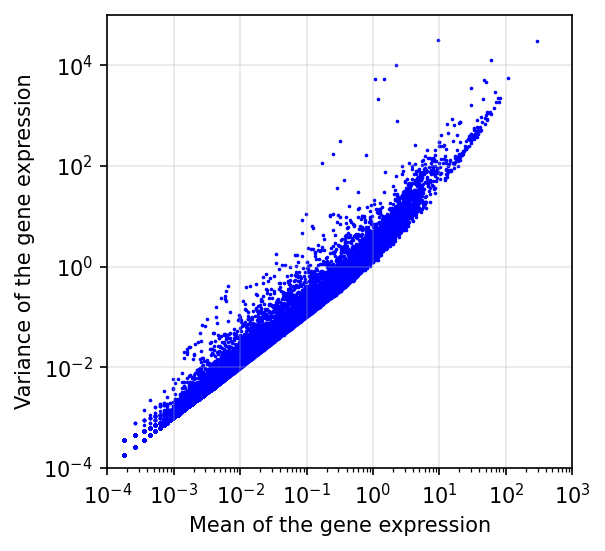

In [ ]:
variance = np.var(adata.layers['counts'].A, axis=0)
mean = np.mean(adata.layers['counts'].A, axis=0)

mean = mean[variance > 0]
variance = variance[variance > 0]

fig, ax = plt.subplots(dpi=150, figsize=(4, 4))

sns.scatterplot(x=mean, y=variance, linewidth=0, s=3, color='blue', ax=ax)
ax.set_xlabel('Mean of the gene expression'); ax.set_ylabel('Variance of the gene expression')
ax.set_xscale('log'); ax.set_yscale('log')

ax.set_xlim(xmin=0.0001, xmax=1000.0)
ax.set_ylim(ymin=0.0001, ymax=100000.0)

ax.grid(alpha=0.3)

A probabilistic model that describes the distribution of the UMI number of a gene per cell is an inverse binomial distribution:

$$n(\mathrm{UMI}) \sim NB(\mu; \mu + \frac{\mu^2}{\theta}).$$

Several different approaches can be used to control variance. The first (earliest) is easiest — first, we should normalize the number of counts of each cell so that this value is equal to some constant (e.g.,let's choose the value of 10,000), and then log the normalized counts (i.e., we take the log(x + 1) function to avoid the problem with zeros and have only positive values in the result). Such a method in the 'Seurat' library is called _LogNormalize_.

In [ ]:
print('UMI amounts per cell before normalization:', adata.X.sum(axis=1).T)

sc.pp.normalize_total(adata) # normalization
print('UMI amounts per cell after normalization:', adata.X.sum(axis=1).T)

UMI amounts per cell before normalization: [[16164. 11838. 14493. ...  6943.  7021.  9646.]]
normalizing counts per cell
    finished (0:00:00)
UMI amounts per cell after normalization: [[9853.    9853.    9853.    ... 9853.    9853.001 9853.   ]]


In [ ]:
sc.pp.log1p(adata) # natural logarithm ln(x + 1)

**Preparing for clustering and dimensionality reduction**

Many of the further manipulations are optional, however, as practice shows, this sequence of actions usually leads to the most adequate results. Our task is to perform dimensionality reduction and clustering that will carry the maximum amount of biological meaning on the one hand, and on the other — contain as little noise as possible.

The first thing we should do is to isolate the most highly variable genes. This is necessary to amplify the signal that we have in our dataset.

In [ ]:
!pip install scikit-misc

In [ ]:
import scanpy as sc

sc.pp.highly_variable_genes(adata,n_top_genes=3000,layer='counts',flavor='seurat_v3') # we extract highly variable genes (HVG)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


Now adata.var has a separate field that tells us whether a gene is highly variable ('highly_variable_').

In [ ]:
adata.var.head()

,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,highly_variable_rank,means,variances,variances_norm
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,False,0,0.000000,100.000000,0.0,False,NaN,0.000000,0.000000,0.000000
FAM138A,ENSG00000237613,Gene Expression,GRCh38,False,1,0.000083,99.991656,1.0,False,NaN,0.000088,0.000088,0.999729
OR4F5,ENSG00000186092,Gene Expression,GRCh38,False,0,0.000000,100.000000,0.0,False,NaN,0.000000,0.000000,0.000000
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,False,111,0.009596,99.073765,115.0,False,NaN,0.009254,0.009698,0.792928
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,False,7,0.000584,99.941589,7.0,False,NaN,0.000617,0.000617,0.941299


Next, we will carry out various manipulations with the data: scaling, regression, etc. And it is important for us to keep the original (true) values of expressions somewhere (in order to have access for them, for example, during the analysis of differential expression, etc.). For this, there is a separate adata.raw object. In fact, it is a separate object of the AnnData format, which is bound to another. And in the future, if we want to access to it, we will need to specify 'use_raw=True' in the functions.

In [ ]:
adata.raw = adata

Next, we will leave in our object only the genes that we were attributed to HVG. It is important to remember that we have not 'forgotten' about the other genes, they are stored in the .raw slot. We will get a dataset whose dimension is several times smaller than the original one. This is already a good start to work (high dimensions in statistical methods and ML — evil).

In [ ]:
adata = adata[:, adata.var.highly_variable] # we keep only a subset of the genes that belong to HVG
print(adata)

View of AnnData object with n_obs × n_vars = 11346 × 3000
    obs: 'cell_type', 'tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'scrublet', 'log1p', 'hvg'
    layers: 'counts'


Then we will calibrate the data, that is, we will make sure that the average expression of each gene is 0, and the variance is 1 (this is important before the next stages). The form of distribution does not change from this, this distribution is only 'transferred' and 'scaled'. Why do this? First of all, due to the fact that despite the logarithm, we have not done completely the variance control (there are no problems with this in SCTransform (https://github.com/satijalab/sctransform)).

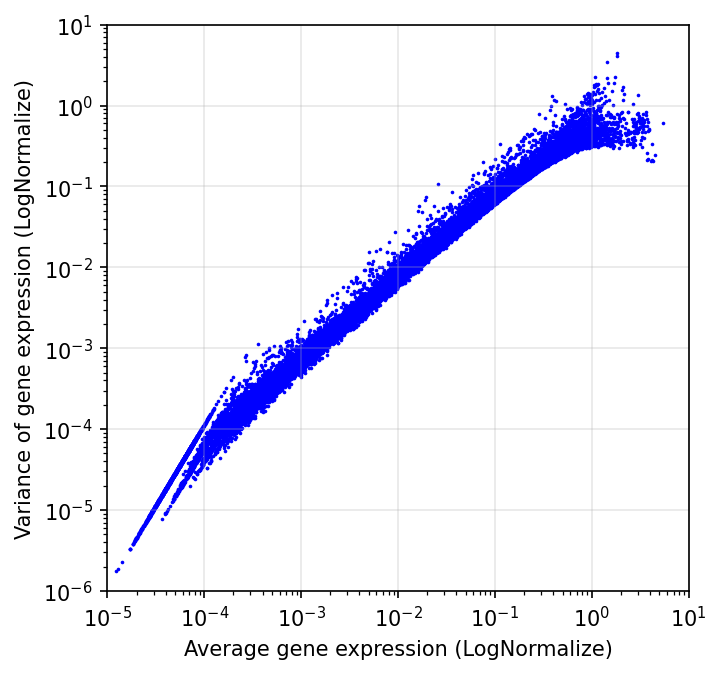

In [ ]:
variance = np.var(adata.raw.X.A, axis=0)
mean = np.mean(adata.raw.X.A, axis=0)

mean = mean[variance > 0]
variance = variance[variance > 0]

fig, ax = plt.subplots(dpi=150, figsize=(5, 5))

sns.scatterplot(x=mean, y=variance, linewidth=0, s=3, color='blue', ax=ax)
ax.set_xlabel('Average gene expression (LogNormalize)'); ax.set_ylabel('Variance of gene expression (LogNormalize)')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(xmin=0.00001, xmax=10.0)
ax.set_ylim(ymin=0.000001, ymax=10.0)

ax.grid(alpha=0.3)

So, let's scale and see what has changed in the data:

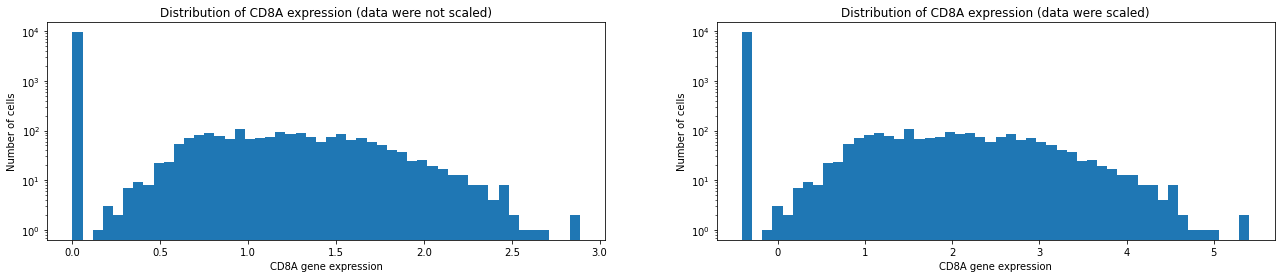

In [ ]:
sc.pp.scale(adata) # scaling

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(22, 4)) # creating a grid for two plots

# Example
# Distribution of CD8A gene expression on non-calibrated data
sns.distplot(adata.raw[:, 'CD8A'].X.todense(), kde=False, ax=axs[0], hist_kws={'alpha':1})
axs[0].set_xlabel('CD8A gene expression')
axs[0].set_ylabel('Number of cells')
axs[0].set_title('Distribution of CD8A expression (data were not scaled)')
axs[0].set_yscale('log')

# Distribution of CD8A gene expression on calibrated data
sns.distplot(adata[:, 'CD8A'].X, kde=False, ax=axs[1], hist_kws={'alpha':1})
axs[1].set_xlabel('CD8A gene expression')
axs[1].set_ylabel('Number of cells')
axs[1].set_title('Distribution of CD8A expression (data were scaled)')
axs[1].set_yscale('log')

**Dimensionality reduction and clustering**

Next, we need to conduct an analysis using the principal component method. This
will allow us to get a primary idea of how the data is distributed in space,
it will be needed further, because the first N components of PCA retain maximum biological significance and at the same time noise can be eliminated.

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)


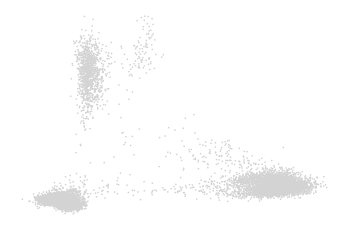

In [ ]:
sc.tl.pca(adata) # calculate the PCA
sc.pl.pca(adata, frameon=False) # drawing the PCA

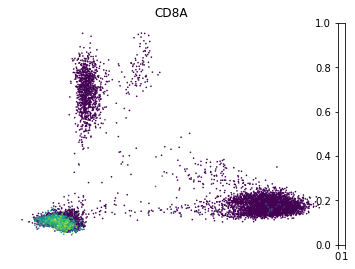

In [ ]:
try:
    sc.pl.pca(adata, color=['CD8A'], frameon=False) # drawing PCA
except TypeError:
    pass  # do nothing 
# due to incompatibilities in the versions of matlotlib and scanpy

This is so far from a beautiful picture, in which various cell populations are clearly visible. But this is normal, because clustering and population analysis will be carried out not on PCA, but on UMAP. UMAP is usually built on some number of the first components. In order to pick them up, we will draw an ElbowPlot.

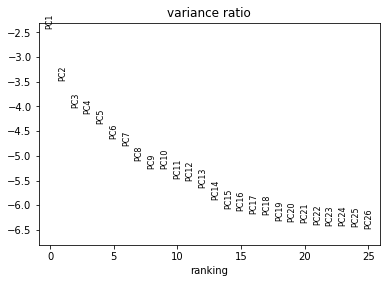

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=25)

Now let's start to reduce the dimension using UMAP and t-SNE. We will take some default parameters to run UMAP and t-SNE (these are relatively stable algorithms).

In [ ]:
sc.pp.neighbors(adata, n_pcs=15, n_neighbors=20) # calculating the neighbor graph - it is a necessary stage before UMAP and t-SNE
sc.tl.umap(adata, min_dist=0.5) # UMAP calculation
sc.tl.tsne(adata, n_pcs=15) # t-SNE calculation

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:46)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)
computing tSNE
    using 'X_pca' with n_pcs = 15
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:01:58)


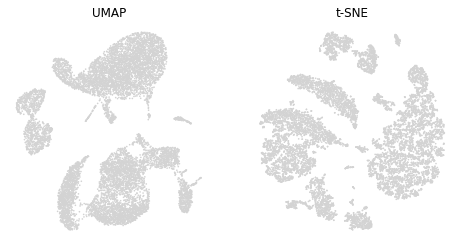

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))
sc.pl.umap(adata, frameon=False, ax=axs[0], title='UMAP', show=False) # drawing UMAP
sc.pl.tsne(adata, frameon=False, ax=axs[1], title='t-SNE', show=False) # drawing t-SNE
plt.show()

Now we are going to cluster the data. There are many clustering algorithms, but we prefer to use the Leiden algorithm.

In [ ]:
!pip install leidenalg

In [ ]:
sc.tl.leiden(adata) # clustering by the Leiden algorithm

running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


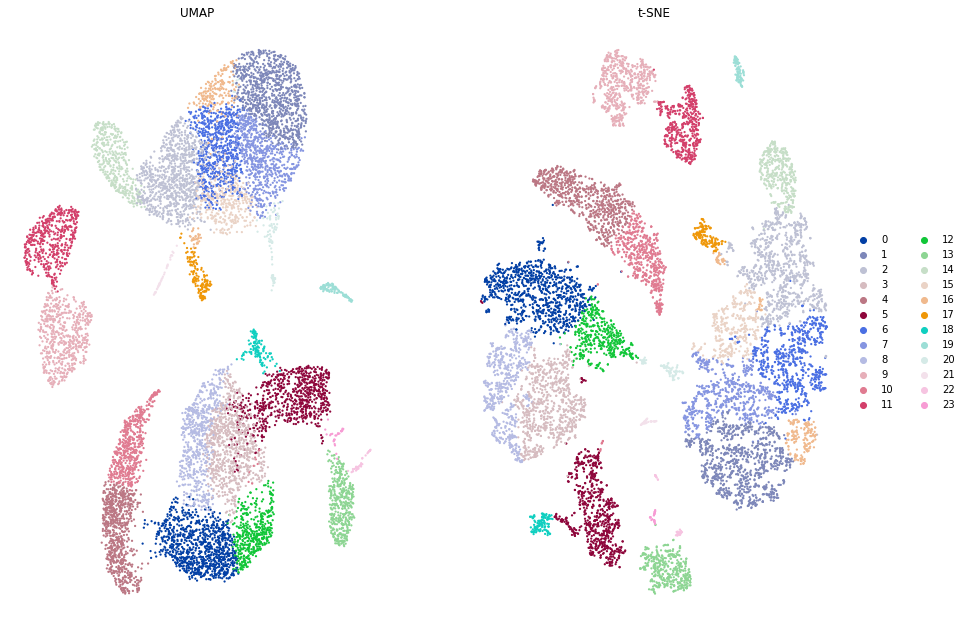

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 11))
sc.pl.umap(adata, color='leiden', frameon=False, ax=axs[0], title='UMAP', show=False, legend_loc=None, s=20) # drawing UMAP
sc.pl.tsne(adata, color='leiden', frameon=False, ax=axs[1], title='t-SNE', show=False, s=20) # drawing t-SNE
plt.show()

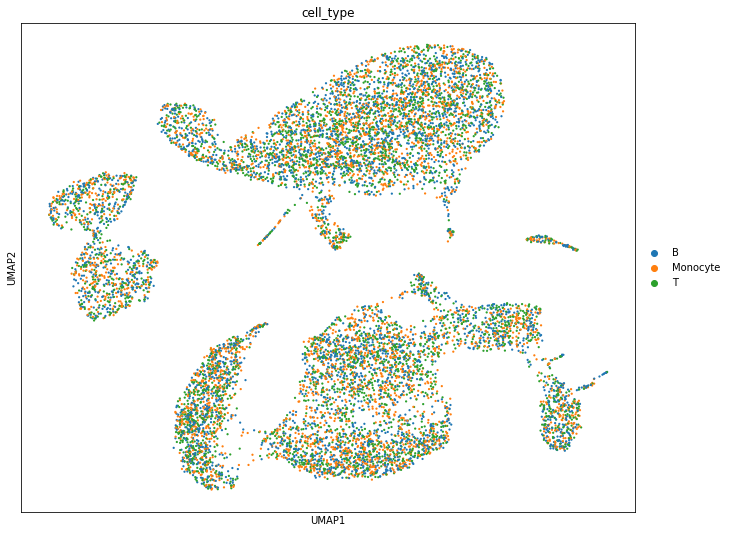

In [ ]:
try:
    plt.rcParams['figure.figsize'] = (11,9)
    sc.pl.umap(adata, color=['cell_type'], s=20)
except TypeError:
    pass  # do nothing 
# due to incompatibilities in the versions of matlotlib and scanpy

R: No, at a first glance, the results (a) and (b) do not coincide. we know why.. because of random choice.. p.s. it's just for practice.

## 4. Metrics from the article [1]

[1] 'Benchmarking atlas-level data integration in single-cell genomics' - https://www.nature.com/articles/s41592-021-01336-8.

_______________

Read the article by Fabian Theis' group with the benchmarking of batch correction methods. What metric do they use to evaluate the quality of integration? Use the same metric (or the same metrics, if there are several of them) to evaluate the quality of processing your data using the log1pPF method (in this case, we will use this metric to evaluate the quality of processing, not integration!).

Notes from the article:

'We evaluated methods according to scalability, usability and their ability to remove batch effects while retaining biological variation using **14 evaluation metrics**. **We show that highly variable gene selection improves the performance of data integration methods, whereas scaling pushes methods to prioritize batch removal over conservation of biological variation**.'

'Our freely available Python module and benchmarking pipeline can identify optimal data integration methods for new data, benchmark new methods and improve method development.'

'_Integration accuracy was evaluated using 14 performance metrics divided into two categories:_ **removal of batch effects** and **conservation of biological variance**.' 

In this task, we have no any batches (according to the task rules); so, the important for us - conservation of biological variance..

_**Conservation of biological variation** in single-cell data can be captured at the scale of cell identity labels (label conservation) and beyond this level of annotation (label-free conservation). 'Therefore, we used both classical label conservation metrics, which assess local neighborhoods (graph cLISI, extended from cLISI), global cluster matching (Adjusted Rand Index (ARI), normalized mutual information (NMI)) and relative distances (cell-type ASW) as well as two new metrics evaluating rare cell identity annotations (isolated label scores) and three new label-free conservation metrics: (1) cell-cycle variance conservation, (2) overlaps of highly variable genes (HVGs) per batch before and after integration and (3) conservation of trajectories._

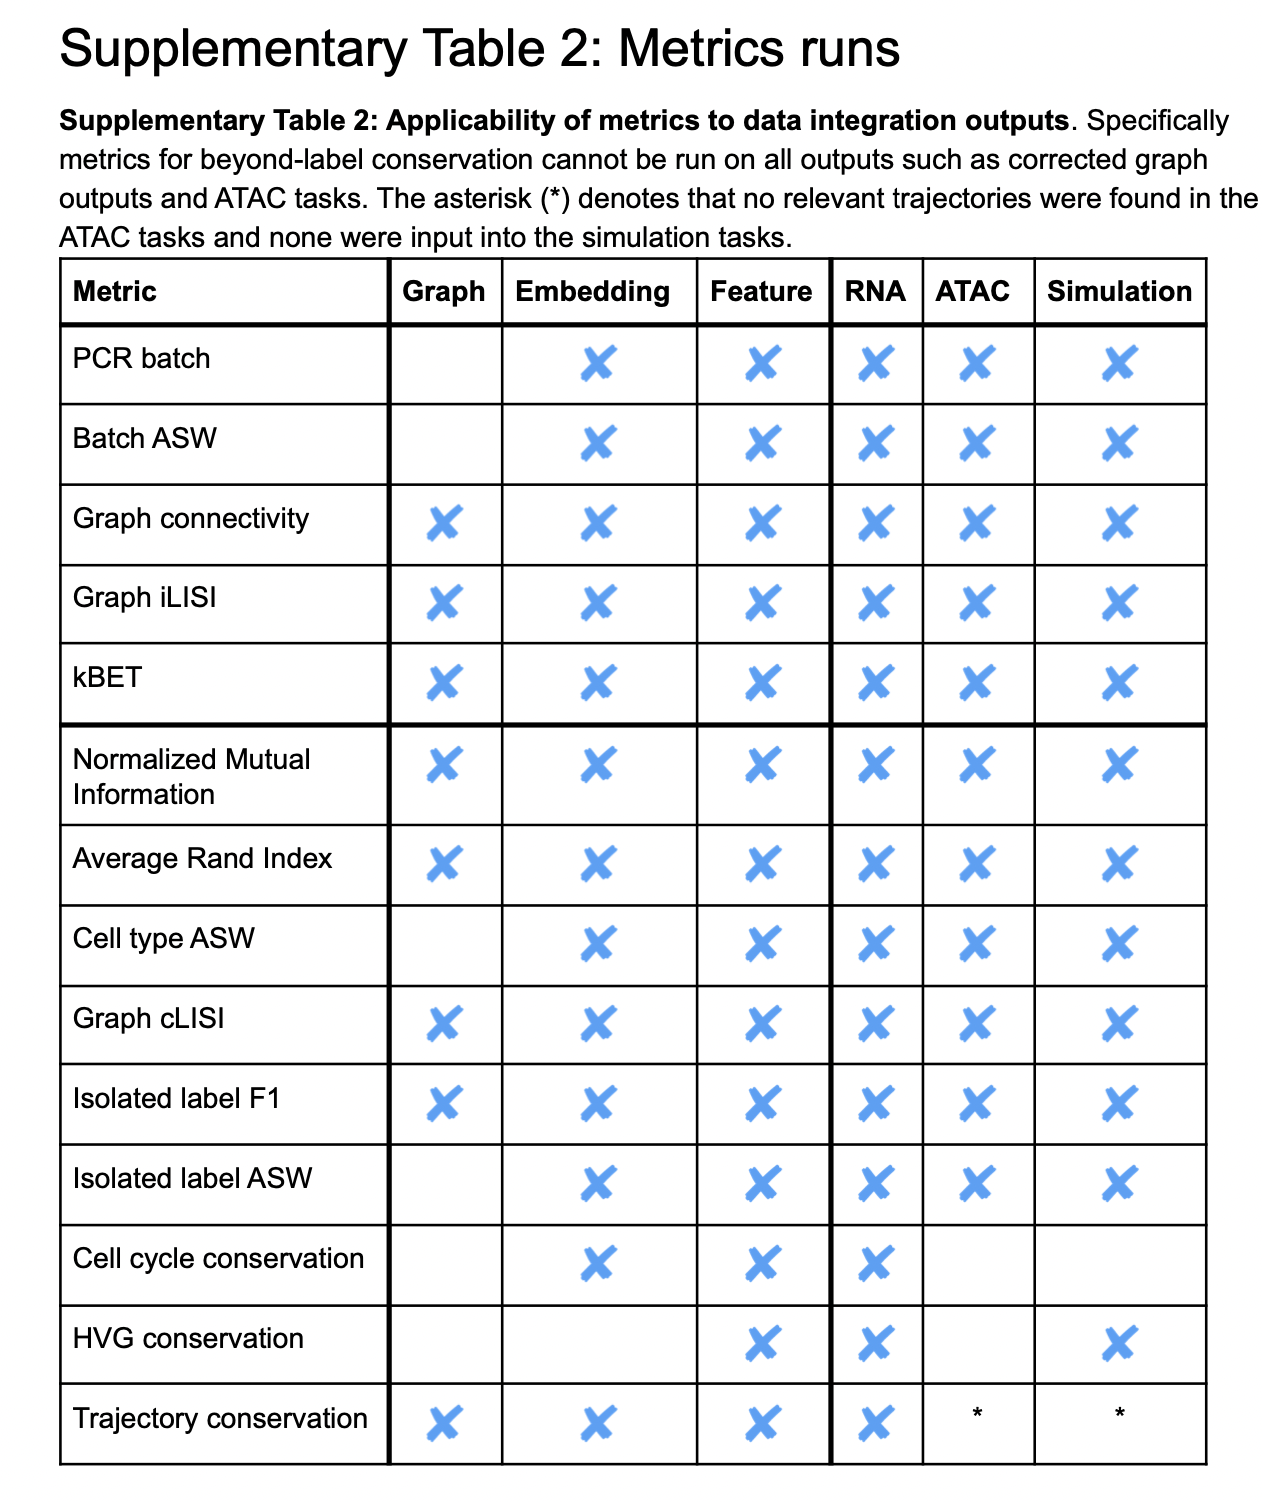

## 5. Pipeline (analysis) modification

In [ ]:
adata = sc.read_10x_h5('10k_PBMC_3p_nextgem_Chromium_X_intron_filtered_feature_bc_matrix.h5')
adata.var_names_make_unique()
adata

reading 10k_PBMC_3p_nextgem_Chromium_X_intron_filtered_feature_bc_matrix.h5
 (0:00:03)


AnnData object with n_obs × n_vars = 11984 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

**Filtering**

In [ ]:
mask = adata.var_names.str.startswith('MT-')

print(f'Mito genes: {adata.var_names[mask].tolist()}')

adata.var['mt'] = mask

Mito genes: ['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']


In [ ]:
# very harsh thresholds to keep comp. time small 
sc.pp.filter_cells(adata, min_genes=1000)
sc.pp.filter_genes(adata, min_cells=100)
adata

filtered out 155 cells that have less than 1000 genes expressed
filtered out 20764 genes that are detected in less than 100 cells


AnnData object with n_obs × n_vars = 11829 × 15837
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells'

In [ ]:
# calculate common QC metrics
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

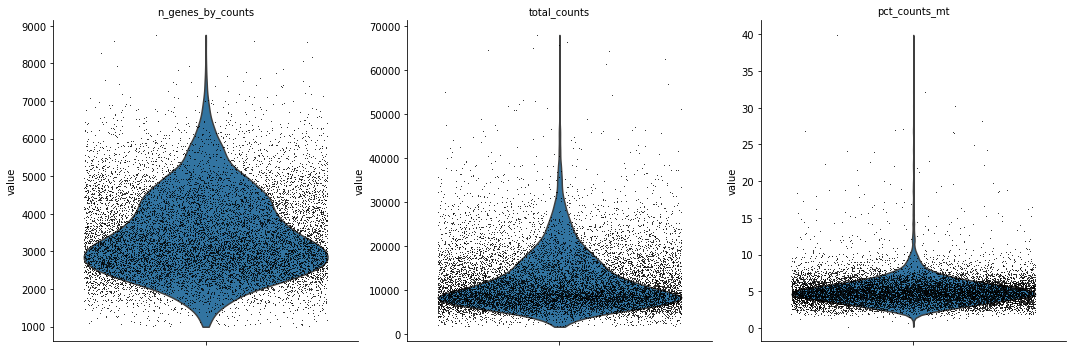

In [ ]:
# plot the result
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [ ]:
# apply filters
adata = adata[adata.obs.n_genes_by_counts < 8000, :]
adata = adata[adata.obs.total_counts < 30000, :]
adata = adata[adata.obs.pct_counts_mt < 12, :]
adata

View of AnnData object with n_obs × n_vars = 11434 × 15837
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [ ]:
# normalize the data & take the log
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


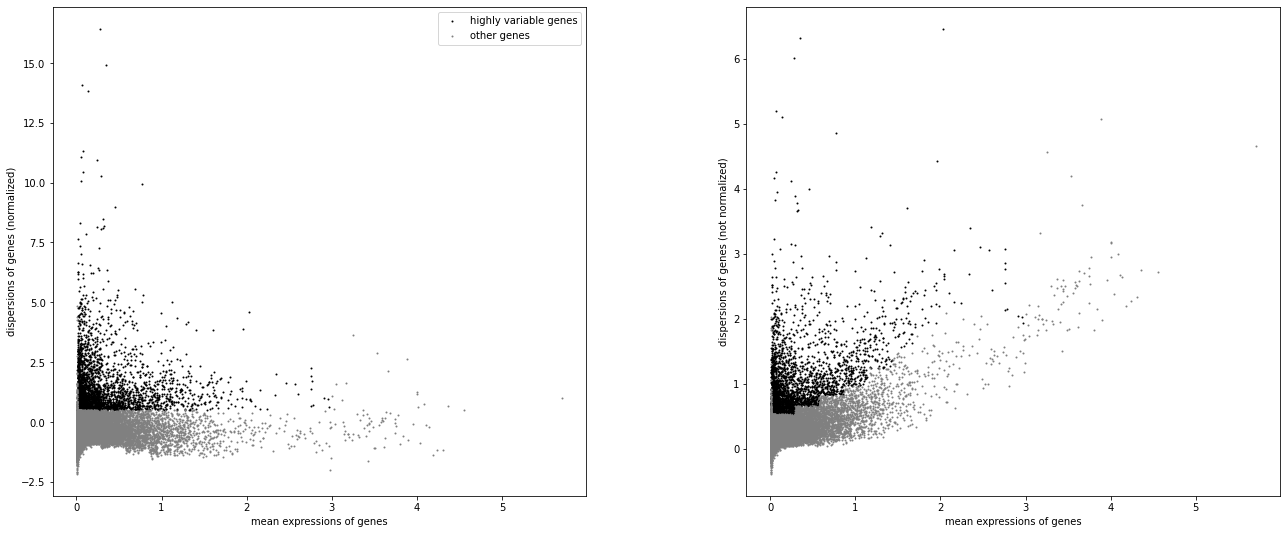

In [ ]:
sc.pp.highly_variable_genes(adata)
sc.pl.highly_variable_genes(adata)

# dispersion of genes (a) normalized (b) not normalized

In [ ]:
adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 11434 × 2982
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) # regress out (mostly) unwanted sources of variation.

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:01:00)


In [ ]:
sc.pp.scale(adata, max_value=10) # clip values > 10

**Dimensionality reduction**

_Scanpy_

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:07)


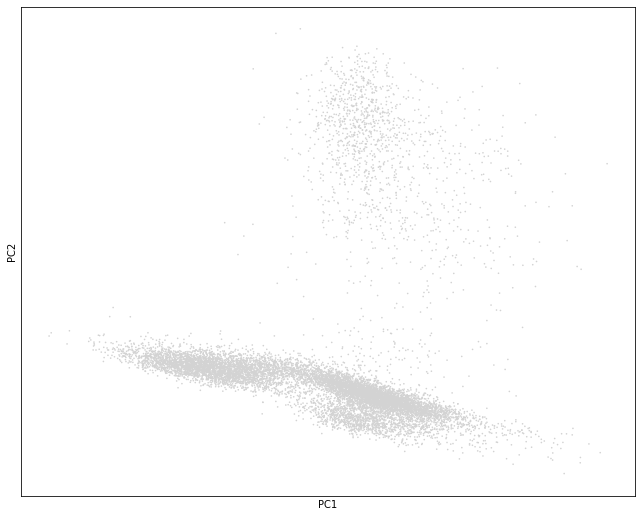

In [ ]:
sc.tl.pca(adata)
sc.pl.pca(adata)

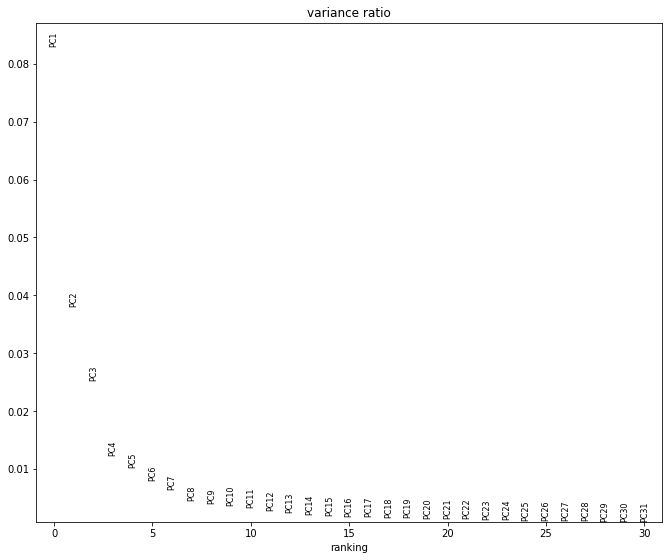

In [ ]:
sc.pl.pca_variance_ratio(adata)

_Sklearn_

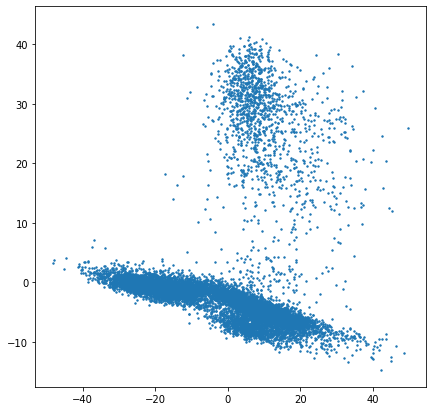

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30, random_state=123).fit(adata.X)

plt.figure(figsize=(7, 7))

transformed = pca.fit_transform(adata.X)
plt.scatter(transformed[:, 0], transformed[:, 1], s=2)
plt.show()

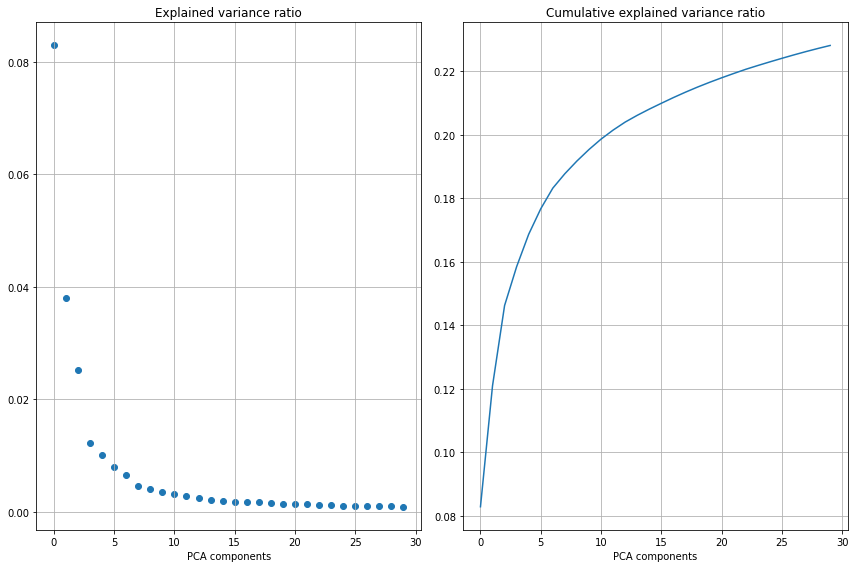

In [ ]:
import numpy as np
fig, axes = plt.subplots(1, 2, sharex=True, figsize = (12, 8))

axes[0].scatter(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
axes[0].set_title('Explained variance ratio') # The explained variance ratio is the percentage of variance that is
# attributed by each of the selected components.

cumulative = np.cumsum(pca.explained_variance_ratio_)
axes[1].plot(cumulative)
axes[1].set_title('Cumulative explained variance ratio') #  The explained variance ratio is an array of the variance of the data explained by
# each of the principal components in data.

for ax in axes:
  ax.grid()
  ax.set_xlabel('PCA components')

fig.tight_layout()
fig.show()

**UMAP**

In [ ]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:23)


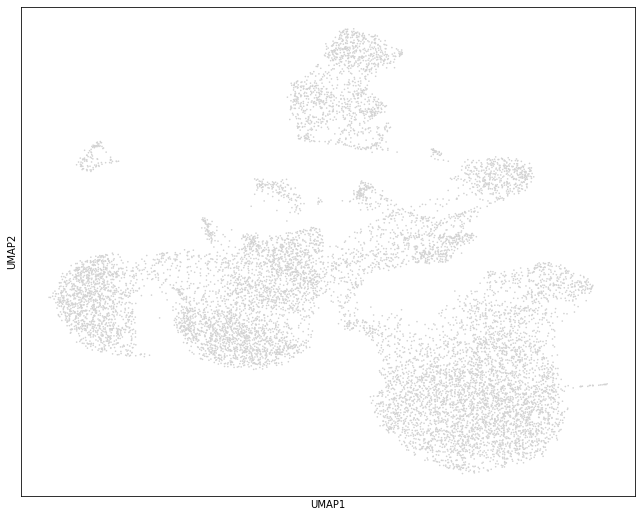

In [ ]:
sc.pl.umap(adata)

**Clustering**

In [ ]:
# subsample to speed up the analysis
sample = sc.pp.subsample(adata, n_obs=3000, copy=True)
sample

AnnData object with n_obs × n_vars = 3000 × 2982
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift

# cluster elements
algorithms = [
    ('K-means', KMeans(n_clusters=10, random_state=12)),
    ('Agglomerative Clustering', AgglomerativeClustering(n_clusters=10)),
    # ('Mean Shift', MeanShift()) # Too long
]

for name, algo in algorithms:
  print(name)
  clustering = algo.fit(sample.X)
  sample.obs[name] = clustering.labels_
  sample.obs[name] = sample.obs[name].astype('category')

K-means
Agglomerative Clustering


In [ ]:
!pip install leidenalg

In [ ]:
# recalculate neighbors and the UMAP
sc.pp.neighbors(sample)
sc.tl.umap(adata)

# run the Leiden clustering
sc.tl.leiden(sample, resolution=0.5)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:17)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


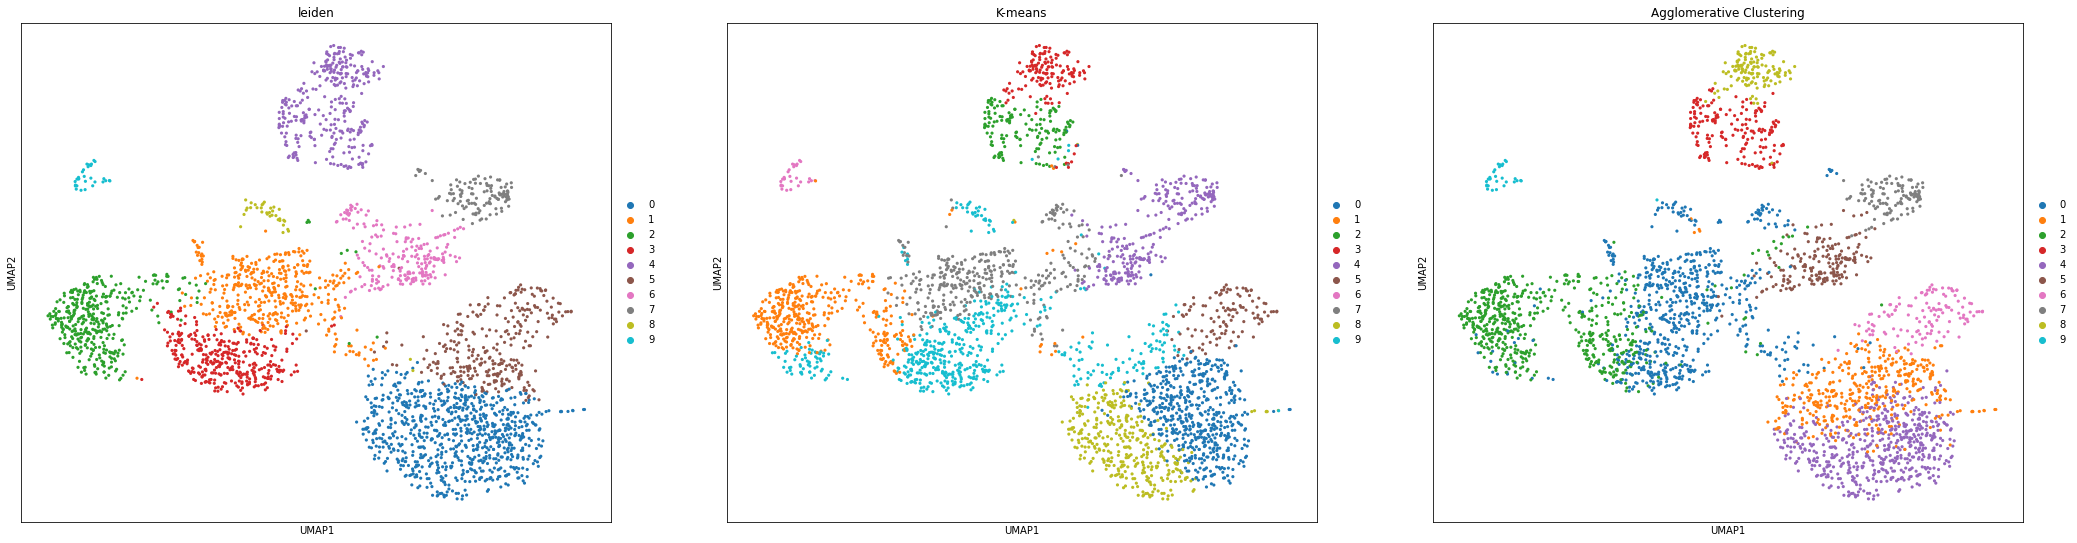

In [ ]:
sc.pl.umap(
    sample,
    color=['leiden', 'K-means', 'Agglomerative Clustering']
)

In [ ]:
###

In [ ]:
import numpy as np

def Kmeans_custom(data, k, threshhold=2):
    n = np.size(data, 0)
    cluster_centers = np.random.choice(range(0, n), k)
    clustering = np.random.randint(0, k, n)
    cluster_means = data[cluster_centers]
    old_clustering = np.zeros(n)
    while np.sum(clustering != old_clustering) > threshhold:
        old_clustering = clustering

        cluster_distances = np.zeros((n, k))
        for cluster in range(k):
            cluster_distances[:, cluster] = \
            np.sum(np.sqrt((data - cluster_means[cluster])**2), 1)
        clustering = np.argmin(cluster_distances, 1)

        cluster_means = np.array([np.mean(data[clustering==c], 0) for c in range(k)])
    return clustering # cluster idx-s

# clust = Kmeans_custom(mat_reduced, 10)
clust = Kmeans_custom(sample.X, 10)
clust

array([9, 5, 9, ..., 1, 5, 5])

In [ ]:
sample.obs["clust"] = clust
sample.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,K-means,Agglomerative Clustering,leiden,clust
TGAGTCAAGTCATTGC-1,1836,1826,5983.0,353.0,5.900050,9,2,2,9
TAAGCGTAGACGACTG-1,4841,4815,19365.0,905.0,4.673380,0,4,5,5
GAGGGTAAGCCTCATA-1,3131,3102,9650.0,340.0,3.523316,1,2,2,9
AGCCACGCAAGTATAG-1,2321,2304,4870.0,256.0,5.256674,4,7,7,7
GGATCTACATGGCCCA-1,3260,3234,11262.0,654.0,5.807139,2,3,4,0
...,...,...,...,...,...,...,...,...,...
GAAGGACTCAACGTGT-1,4020,3976,13796.0,627.0,4.544796,1,2,2,8
TGTTGAGCATAGAGGC-1,1682,1672,3154.0,269.0,8.528852,4,5,6,9
TCGTGGGAGTATGCAA-1,6212,6144,28476.0,1568.0,5.506392,7,0,8,1
TAAGCGTCACGTGAGA-1,1713,1712,3660.0,281.0,7.677595,8,4,0,5


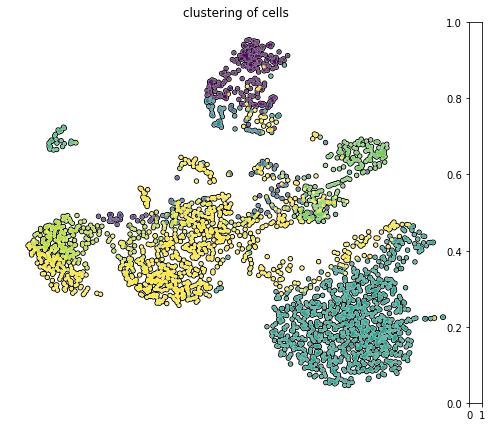

In [ ]:
try:
    sample_copy = sample
    with rc_context({'figure.figsize': (9, 7)}):
      sc.pl.umap(sample_copy, color='clust', add_outline=True, legend_loc='on data',
                 legend_fontsize=12, legend_fontoutline=2,frameon=False,
                 title='clustering of cells', palette='Set')
except TypeError:
    pass  # do nothing 
# due to incompatibilities in the versions of matlotlib and scanpy